## Libraries

For creating this chart, we will need a whole bunch of libraries!

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

The dataset can be accessed using the **url below**.

It contains data about **x-mens** and the number of times they appeared in the comics between the 60's and the 90's.

In [94]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mutant_moneyball.csv'
url = '../../static/data/mutant_moneyball.csv'
df = pd.read_csv(url)

## Data cleaning

In order to make the data ready for the chart, we will need to clean it a bit.

### Name of the x-men

Since the name of the x-men is written in **camelCase**, we will need to split it into two words. For example, *scottSummers* will become *Scott Summers*.

In [95]:
def format_name(s):
    if " " in s:
        return s
    formatted_string = ""
    for i, char in enumerate(s):
        if char.isupper() and i != 0:
            formatted_string += " " + char
        else:
            formatted_string += char
    if formatted_string:
        formatted_string = formatted_string[0].upper() + formatted_string[1:]
    
    return formatted_string

df['Member'] = df['Member'].apply(format_name)

### Transpose the data

The data is currently in a **wide format**. We will need to transpose it to a **long format** in order to make it ready for the chart:

In [96]:
df = df[['Member', 'TotalIssues60s', 'TotalIssues70s', 'TotalIssues80s', 'TotalIssues90s']]
df.set_index('Member', inplace=True)

# transpose the dataframe
df_transposed = df.T

decades = ['1960s', '1970s', '1980s', '1990s'] # values of the x-axis
members = df_transposed.columns # name of the x-mens for the legend
issues_list = df_transposed.T.values.tolist() # values of the x-men

In [97]:
df_transposed

Member,Warren Worthington,Hank Mc Coy,Scott Summers,Bobby Drake,Jean Grey,Alex Summers,Lorna Dane,Ororo Munroe,Kurt Wagner,Logan Howlett,...,Rachel Summers,Eric Magnus,Alison Blaire,Longshot,Jonathan Silvercloud,Remy Le Beau,Jubilation Lee,Lucas Bishop,Betsy Braddock,Charles Xavier
TotalIssues60s,61,62,63,62,63,8,9,0,0,0,...,0,13,0,0,0,0,0,0,0,39
TotalIssues70s,35,38,69,35,58,13,13,36,36,36,...,0,7,0,0,0,0,0,0,0,46
TotalIssues80s,20,9,56,6,14,43,19,121,84,115,...,23,18,43,35,11,0,6,0,45,61
TotalIssues90s,23,10,9,20,29,4,7,33,0,16,...,1,3,2,0,28,17,17,16,14,23


## Simple streamgraph

Thanks to the `stackplot()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/), it is possible to create a simple streamgraph.

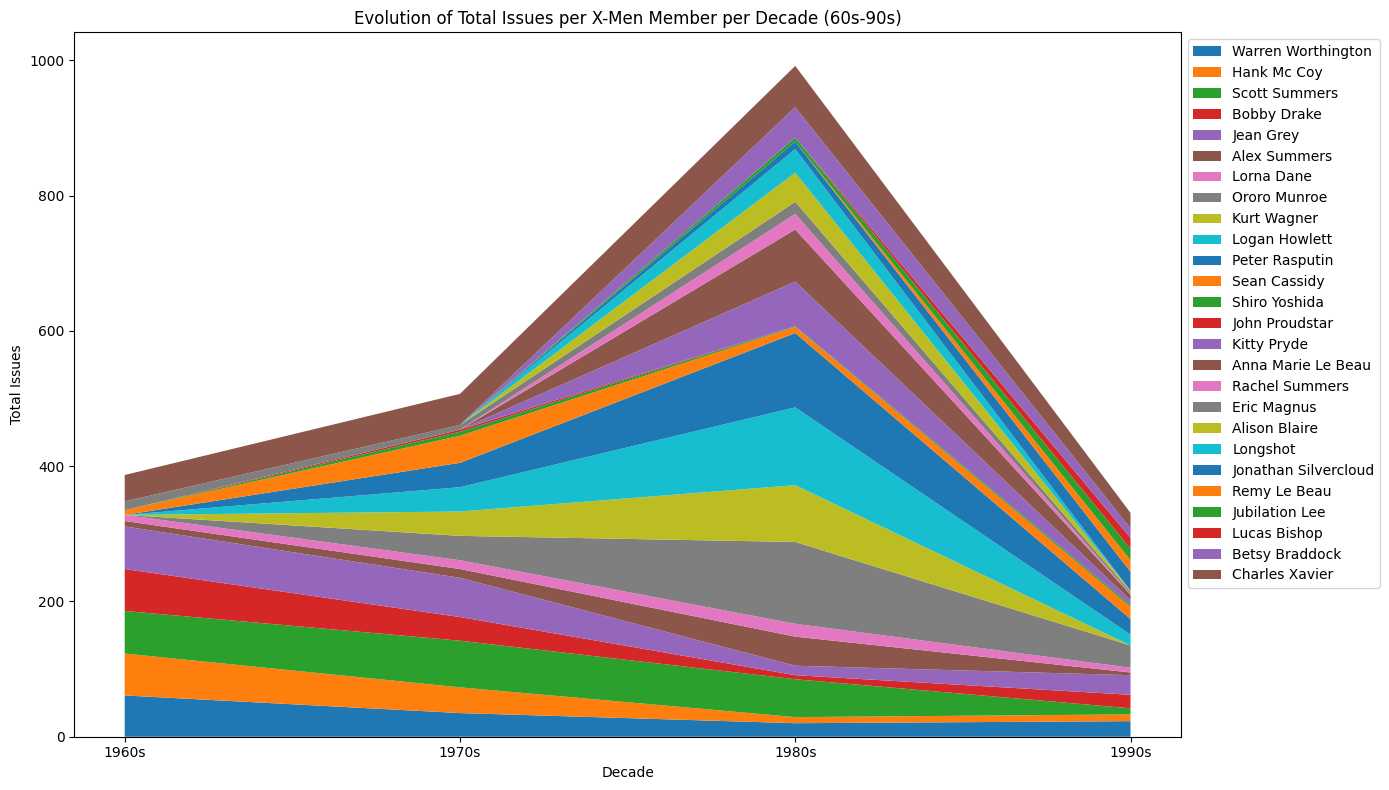

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.stackplot(decades, issues_list, labels=members)
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()


## Custom colors

The color we will use is **based on the value of the total** number of appearances, which means that we have to compute it first.

Then, we create a **list of colors** using the `cm` module from `matplotlib`.

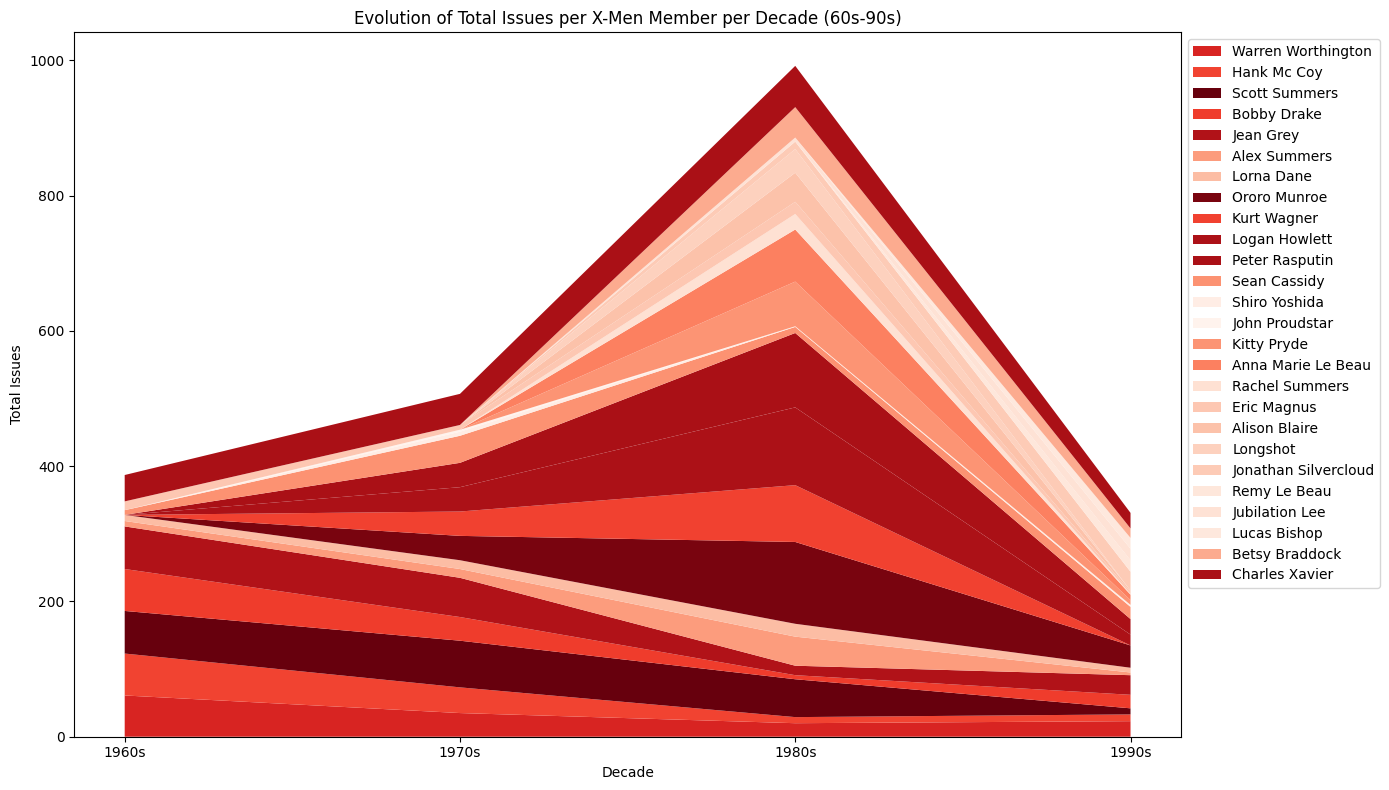

In [98]:
fig, ax = plt.subplots(figsize=(14, 8))

# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

sublist = [sublist[:4] for sublist in issues_list]
ax.stackplot(decades, sublist, labels=members, colors=colors)
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.tight_layout()
plt.show()

## Custom order

If we want to change the order in which x-men are displayed, we can use the `argsort()` function from `numpy`.

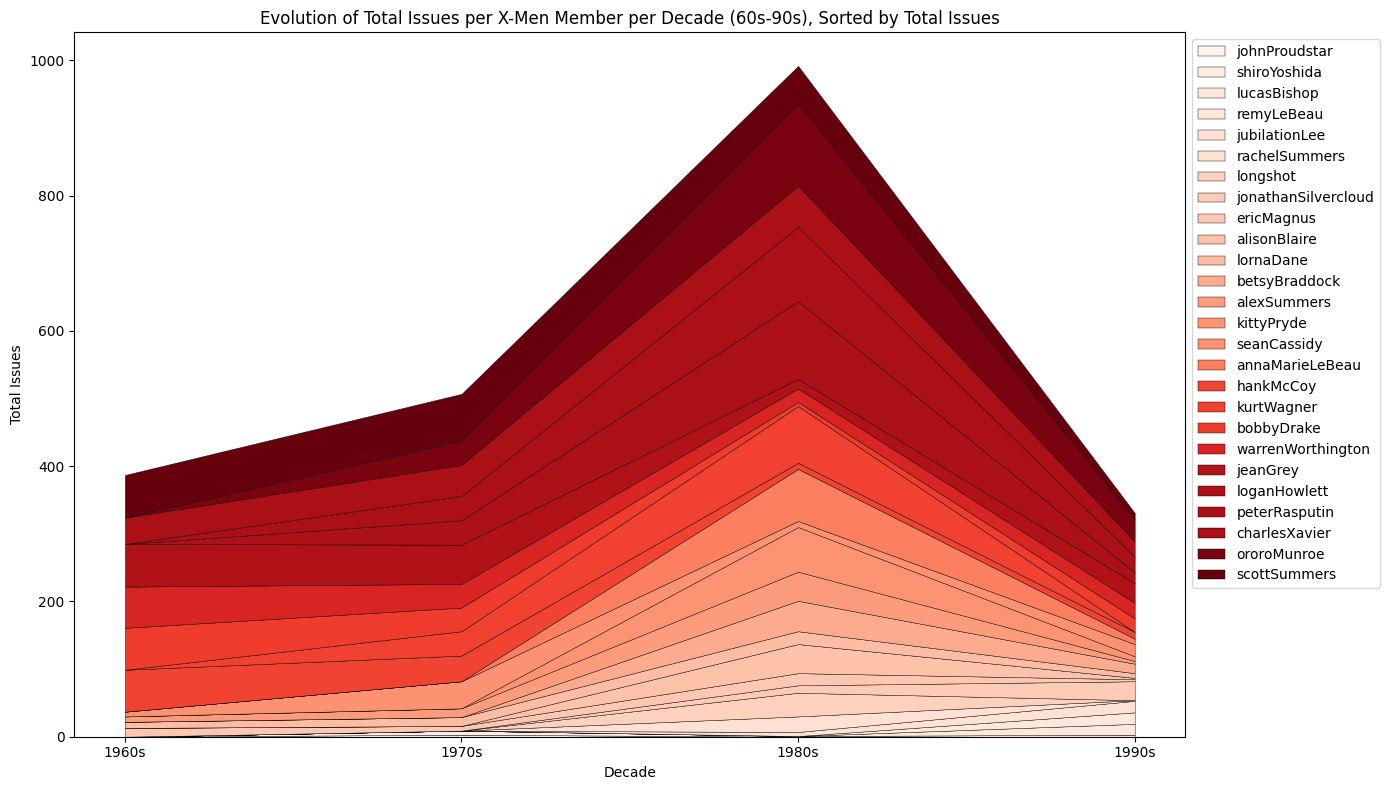

In [52]:
# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

# sort the members by total issues
sorted_indices = np.argsort(total_issues_per_member)
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_issues_list = [sublist[:-1] for sublist in sorted_issues_list]

# plotting
fig, ax = plt.subplots(figsize=(14, 8))
ax.stackplot(
    decades,
    sorted_issues_list,
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.3
)

# setting the title and labels
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s)')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plotting 
fig.tight_layout()
plt.show()

## Change stream style

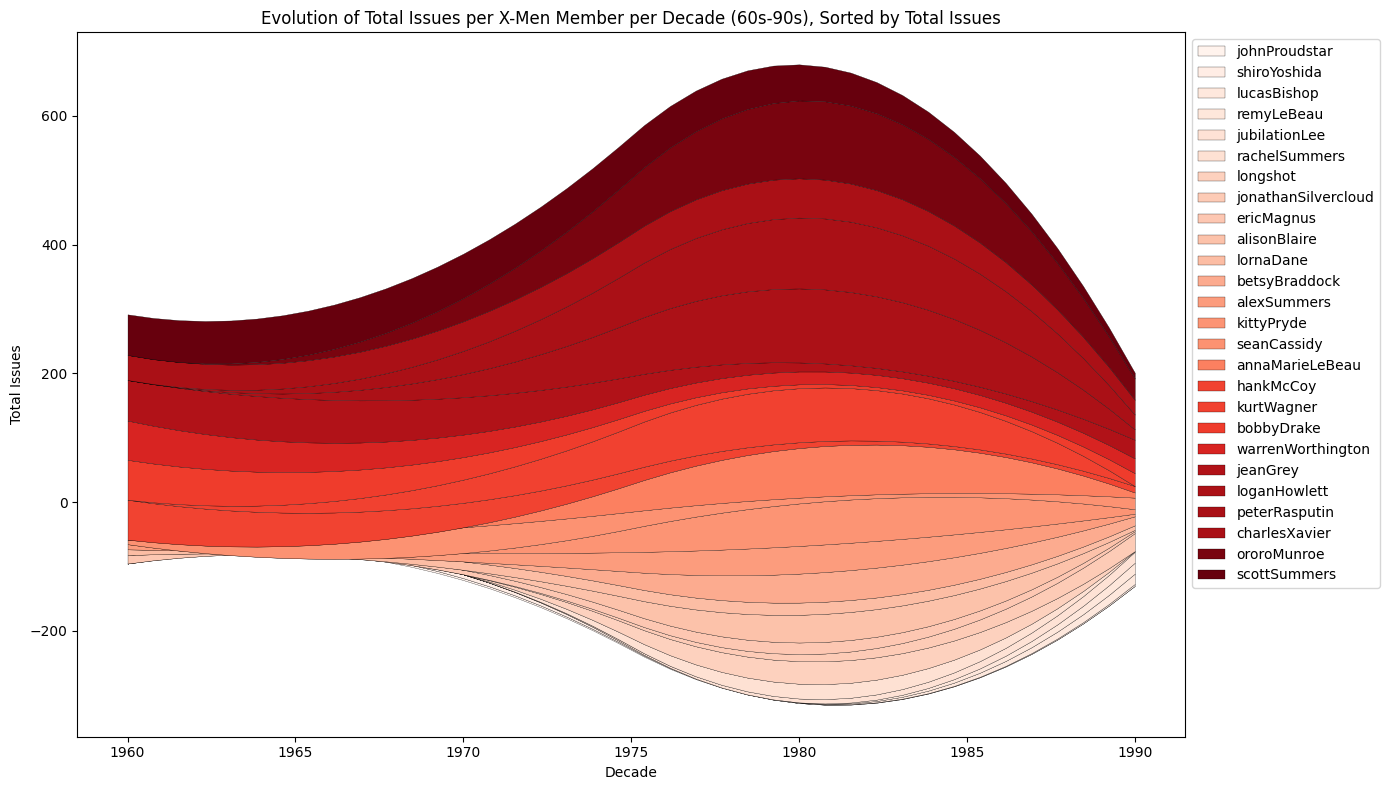

In [80]:
from scipy.interpolate import interp1d

# calculate the normalized totals
total_issues_per_member = np.sum(issues_list, axis=1)
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)
cmap = plt.cm.Reds
colors = cmap(normalized_totals)

# sort the members by total issues
sorted_indices = np.argsort(total_issues_per_member)
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_issues_list = [sublist[:-1] for sublist in sorted_issues_list]

decadesforsmooth = np.arange(1960, 2000, 10)
new_decades = np.linspace(min(decadesforsmooth), max(decadesforsmooth), len(decadesforsmooth) * 10)

# Interpolating each member's issues list for the new_decades
smoothed_issues_list = []
for issues in sorted_issues_list:
    # create an interpolation function based on the original decades and issues
    interp_func = interp1d(decadesforsmooth, issues, kind='quadratic')  # 'quadratic' for smooth curves, can try 'cubic' for smoother
    # use the interpolation function to estimate issues for the new_decades
    smoothed_issues = interp_func(new_decades)
    smoothed_issues_list.append(smoothed_issues)

# create the chart
fig, ax = plt.subplots(figsize=(14, 8))
ax.stackplot(
    new_decades,  
    smoothed_issues_list,  
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.2,
    baseline='wiggle'
)

# setting the title and labels
ax.set_title('Evolution of Total Issues per X-Men Member per Decade (60s-90s), Sorted by Total Issues')
ax.set_ylabel('Total Issues')
ax.set_xlabel('Decade')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# plotting
fig.tight_layout()
plt.show()

## Update axis and legend

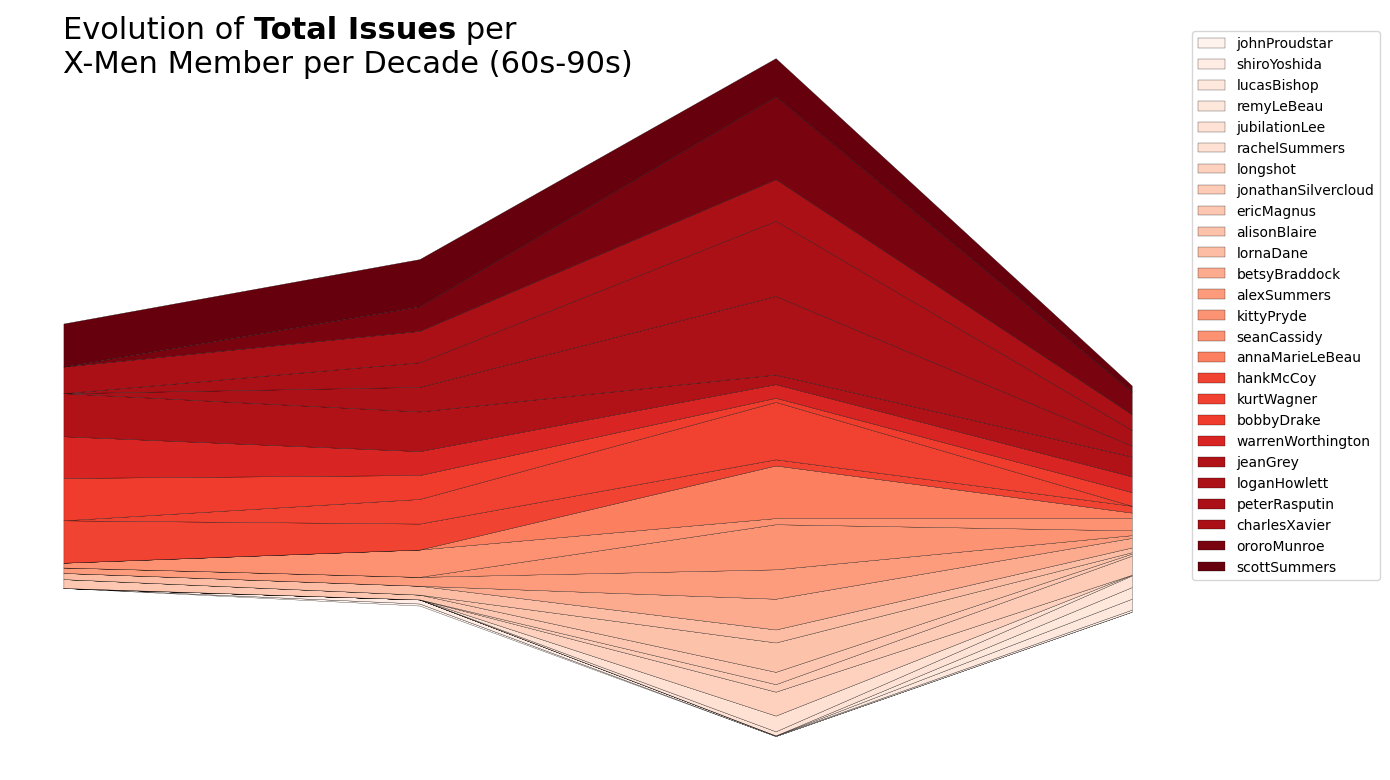

In [83]:
import matplotlib.pyplot as plt
import numpy as np


# Calculate total issues per X-Men member
total_issues_per_member = np.sum(issues_list, axis=1)

# Normalize these totals for color mapping
normalized_totals = total_issues_per_member / np.max(total_issues_per_member)

# Choose a continuous colormap
cmap = plt.cm.Reds

# Get colors from the colormap
colors = cmap(normalized_totals)

# Sort the issues_list, members, and colors based on total_issues_per_member
# Create an array of indices that would sort the total_issues array
sorted_indices = np.argsort(total_issues_per_member)

# Use the indices to sort everything
sorted_issues_list = np.array(issues_list)[sorted_indices]
sorted_members = np.array(members)[sorted_indices]
sorted_colors = colors[sorted_indices]
sorted_issues_list = [sublist[:-1] for sublist in sorted_issues_list]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
ax.stackplot(
    decades,
    sorted_issues_list,
    labels=sorted_members,
    colors=sorted_colors,
    edgecolor='black',
    linewidth=0.2,
    baseline='wiggle'
)

# Setting the title and labels
title = 'Evolution of <Total Issues> per\nX-Men Member per Decade (60s-90s)'
ax_text(
    x=0.8,
    y=650,
    s=title,
    fontsize=22,
    ha='center',
    va='bottom',
    highlight_textprops=[{'fontweight': 'bold'}],
    ax=ax
)
ax.set_axis_off()

# Creating a legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjusting layout
fig.tight_layout()

# Show the plot
plt.show()

## Going further

This article explains how to reproduce a [line chart](https://python-graph-gallery.com/line-chart/) with small multiples, originally design by Gilbert Fontana. 

For more examples of **advanced customization**, check out this [other reproduction of Fontana](https://python-graph-gallery.com/web-stacked-line-chart-with-labels/)'s work. Also, you might be interested in [adding an image/logo](https://python-graph-gallery.com/513-add-logo-matplotlib/) to your chart. 